<a href="https://colab.research.google.com/github/xDaryamo/NFR-Security-Extraction-Classification/blob/master/keywords_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0) Dipendenze

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import ast
import matplotlib.pyplot as plt

##1) Caricamento del Dataset

In [ ]:
root="https://raw.githubusercontent.com/xDaryamo/NFR-Security-Extraction-Classification/master/"


#df è la variabile che contiene il dataset
df=pd.read_excel(root + "dataset.xlsx")
df=df[["Sentence","Entities", "Dependencies", "Parts of Speech", "Categories", "Security Words", "Security"]]
df.head(5)

,Sentence,Entities,Dependencies,Parts of Speech,Categories,Security Words,Security
0,The vision of healthier Canadians through inno...,"['The', 'vision', 'of', 'healthier', 'NORP', '...","['det', 'nsubjpass', 'prep', 'amod', 'pobj', '...","['DET', 'NOUN', 'ADP', 'ADJ', 'PROPN', 'ADP', ...","['CONFIDENTIALITY', 'AVAILABILITY', 'INTEGRITY']",['access'],1
1,"Once completed, the electronic health record (...","['Once', 'completed', 'the', 'electronic', 'he...","['advmod', 'advcl', 'det', 'amod', 'compound',...","['ADV', 'VERB', 'DET', 'ADJ', 'NOUN', 'NOUN', ...",none,none,0
2,Canada Health Infoway's (Infoway's) Nursing Re...,"['ORG', 'ORG', 'ORG', 'ORG', 'ORG', ""'s"", 'ORG...","['compound', 'compound', 'poss', 'case', 'poss...","['PROPN', 'PROPN', 'PROPN', 'PART', 'PROPN', '...",none,none,0
3,Timely access to information will help inform ...,"['Timely', 'access', 'to', 'information', 'wil...","['amod', 'nsubj', 'prep', 'pobj', 'aux', 'ROOT...","['ADJ', 'NOUN', 'ADP', 'NOUN', 'AUX', 'VERB', ...",['AVAILABILITY'],['access'],1
4,"As part of the NRG, a pan-Canadian working gro...","['As', 'part', 'of', 'the', 'ORG', 'a', 'NORP'...","['prep', 'pobj', 'prep', 'det', 'pobj', 'det',...","['ADP', 'NOUN', 'ADP', 'DET', 'PROPN', 'DET', ...",none,none,0


In [ ]:
df_original = df.copy()
df.drop(df[df.Security == 0.0].index, inplace=True)
df = df.reset_index()  # make sure indexes pair with number of rows
df.head()

,index,Sentence,Entities,Dependencies,Parts of Speech,Categories,Security Words,Security
0,0,The vision of healthier Canadians through inno...,"['The', 'vision', 'of', 'healthier', 'NORP', '...","['det', 'nsubjpass', 'prep', 'amod', 'pobj', '...","['DET', 'NOUN', 'ADP', 'ADJ', 'PROPN', 'ADP', ...","['CONFIDENTIALITY', 'AVAILABILITY', 'INTEGRITY']",['access'],1
1,3,Timely access to information will help inform ...,"['Timely', 'access', 'to', 'information', 'wil...","['amod', 'nsubj', 'prep', 'pobj', 'aux', 'ROOT...","['ADJ', 'NOUN', 'ADP', 'NOUN', 'AUX', 'VERB', ...",['AVAILABILITY'],['access'],1
2,5,It was acknowledged that the EHR needs to enab...,"['It', 'was', 'acknowledged', 'that', 'the', '...","['nsubjpass', 'auxpass', 'ROOT', 'mark', 'det'...","['PRON', 'AUX', 'VERB', 'SCONJ', 'DET', 'PROPN...",['CONFIDENTIALITY'],none,1
3,14,Nursing data: Should be structured and codifie...,"['Nursing', 'data', 'Should', 'be', 'structure...","['compound', 'nsubjpass', 'aux', 'auxpass', 'R...","['NOUN', 'NOUN', 'AUX', 'AUX', 'VERB', 'CCONJ'...",['INTEGRITY'],none,1
4,17,Nursing data: Should be simple and concise to ...,"['Nursing', 'data', 'Should', 'be', 'simple', ...","['compound', 'nsubj', 'aux', 'ROOT', 'acomp', ...","['NOUN', 'NOUN', 'AUX', 'AUX', 'ADJ', 'CCONJ',...",['AVAILABILITY'],['access'],1


In [ ]:
#convertiamo le categorie in liste
df['Categories'] = df['Categories'].apply(lambda x: ast.literal_eval(x))

#2) Analisi

##2.1) Numero requisiti security/non-security dopo la fase di pulizia

1    4032
0    1948
Name: Security, dtype: int64

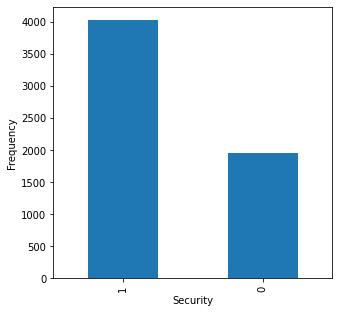

In [ ]:
#Distribuzione della variabile dipendente
plt.figure(figsize=(5,5))
pd.value_counts(df_original['Security']).plot.bar()
plt.xlabel('Security')
plt.ylabel('Frequency')
df_original['Security'].value_counts()

##2.2) Numero requisiti usati nel classificatore multilabel

In [ ]:
print(len(df))

4032


##2.3) Numero di occorrenze delle categorie nel dataset

In [ ]:
cats = ['ACCESS_CONTROL_IDENTITY',	'ACCOUNTABILITY',	'AVAILABILITY',	'CONFIDENTIALITY',	'INTEGRITY',	'OPERATIONAL',	'PRIVACY']
n_cats = dict.fromkeys(cats, 0)
for i in range(0, len(df)):
  categories = df.loc[i]["Categories"]
  for cat in categories:
    n_cats[cat] += 1

n_cats

{'ACCESS_CONTROL_IDENTITY': 249,
 'ACCOUNTABILITY': 3216,
 'AVAILABILITY': 159,
 'CONFIDENTIALITY': 2754,
 'INTEGRITY': 2815,
 'OPERATIONAL': 215,
 'PRIVACY': 238}

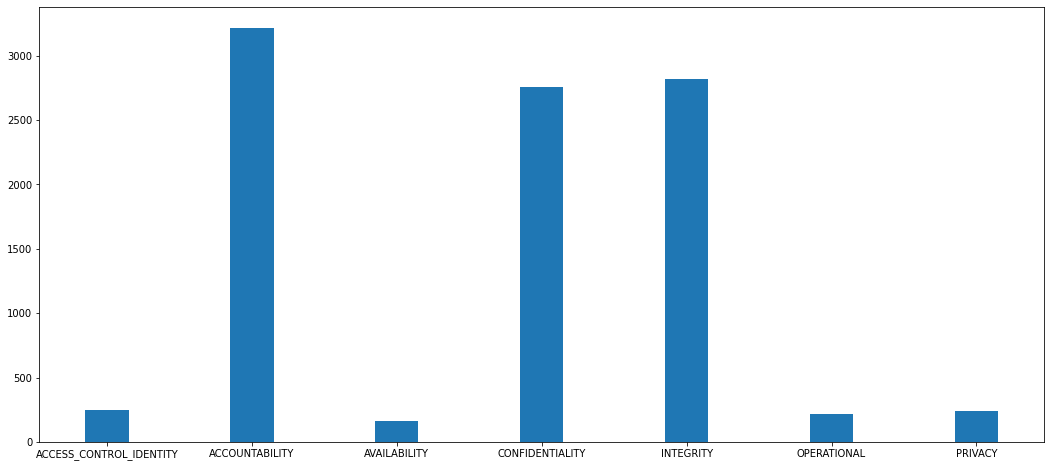

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(n_cats)), list(n_cats.values()), align='center', width=0.3)
plt.xticks(range(len(n_cats)), list(n_cats.keys()))

plt.show()

##2.4) Wordcloud

###2.4.1) Wordcloud tutte le keywords nel dataset

In [ ]:
bow = ""
for lists in df["Security Words"]:
  if lists != 'none':
    lists = ast.literal_eval(lists)
    for words in lists:
        bow += words + " "

#bow

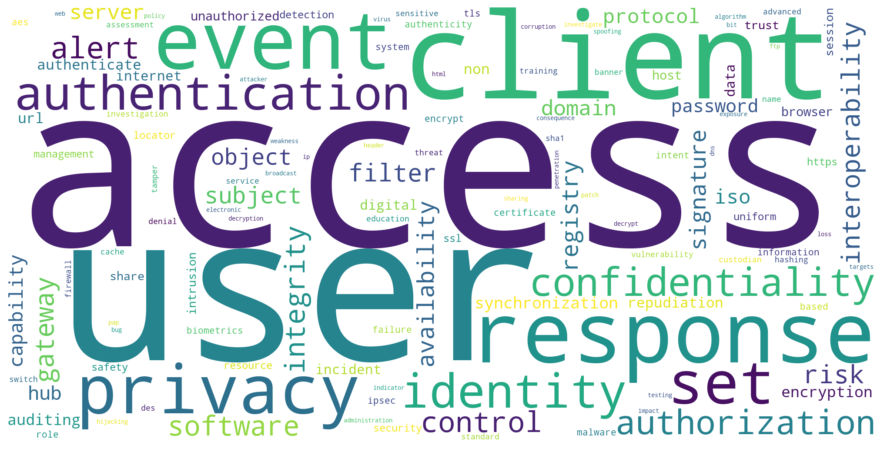

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
keywords_list = []

for i in range(0, len(df)):
  keywords = df.iloc[i]["Security Words"]
  if keywords != 'none': 
    keywords = ast.literal_eval(keywords)
    for word in keywords:
      if word not in keywords_list:
        keywords_list.append(word)
len(keywords_list)

117

In [ ]:
cats = ['ACCESS_CONTROL_IDENTITY',	'ACCOUNTABILITY',	'AVAILABILITY',	'CONFIDENTIALITY',	'INTEGRITY',	'OPERATIONAL',	'PRIVACY']
cats_dict = dict.fromkeys(cats, 0)
for key in cats_dict.keys():
  cats_dict[key] = dict.fromkeys(keywords_list, 0)
  

In [ ]:
for i in range(0, len(df)):
  categories = df.iloc[i]["Categories"]
  keywords = df.iloc[i]["Security Words"]
  if keywords != 'none': 
    keywords = ast.literal_eval(keywords)
    for cat in categories:
      for kw in keywords:
          cats_dict[cat][kw] += 1

#cats_dict

###2.4.2) Wordcloud keywords associate a ACCESS_CONTROL_IDENTITY

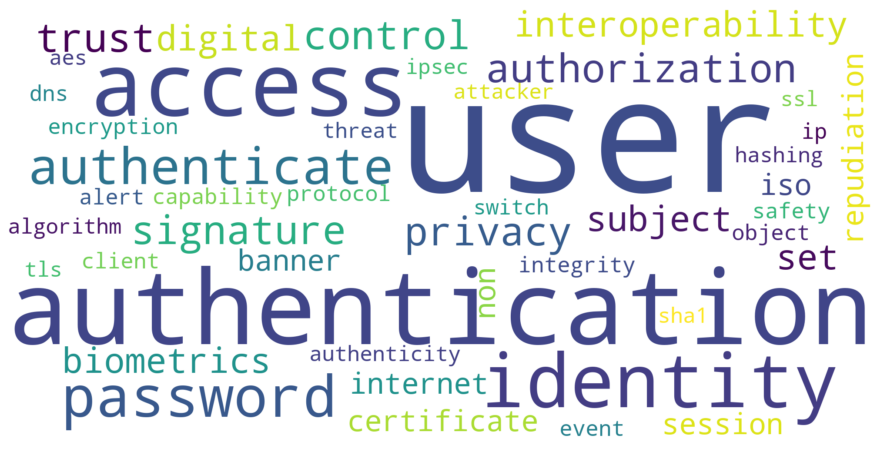

In [ ]:
bow=""

for kw in cats_dict['ACCESS_CONTROL_IDENTITY'].keys():
  for i in range(0, cats_dict['ACCESS_CONTROL_IDENTITY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.3) Wordcloud keywords associate a ACCOUNTABILITY

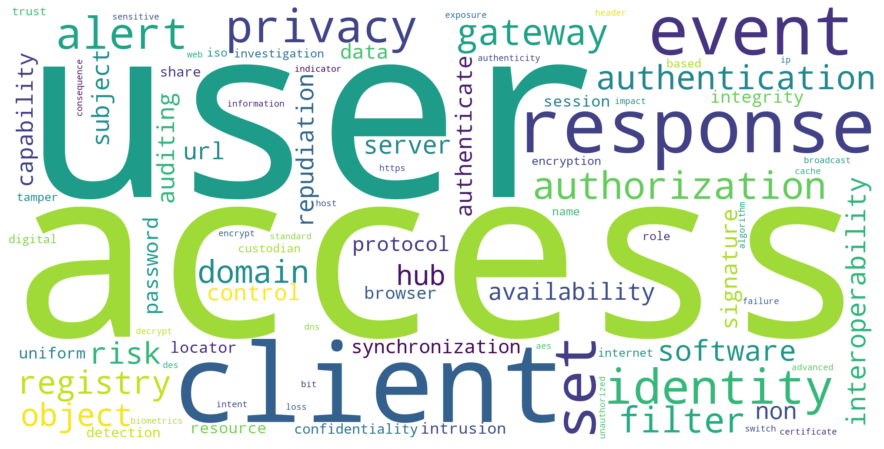

In [ ]:
bow=""

for kw in cats_dict['ACCOUNTABILITY'].keys():
  for i in range(0, cats_dict['ACCOUNTABILITY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.4) Wordcloud keywords associate a AVAILABILITY

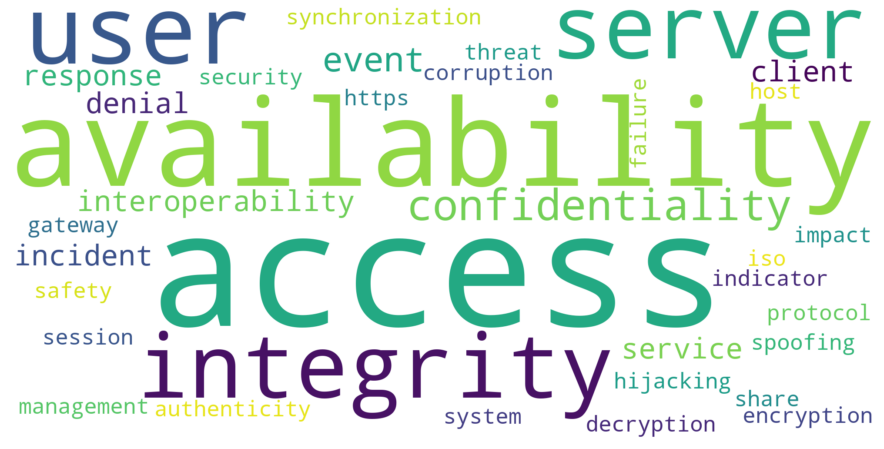

In [ ]:
bow=""

for kw in cats_dict['AVAILABILITY'].keys():
  for i in range(0, cats_dict['AVAILABILITY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.5) Wordcloud keywords associate a CONFIDENTIALITY

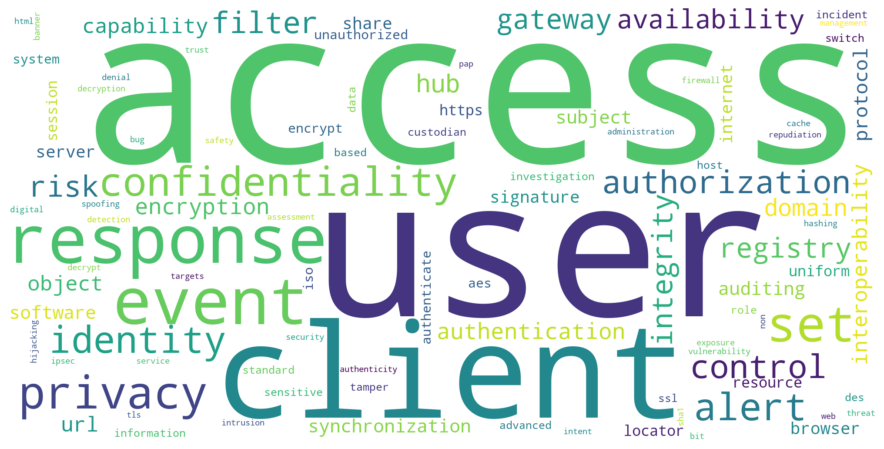

In [ ]:
bow=""

for kw in cats_dict['CONFIDENTIALITY'].keys():
  for i in range(0, cats_dict['CONFIDENTIALITY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.6) Wordcloud keywords associate a INTEGRITY

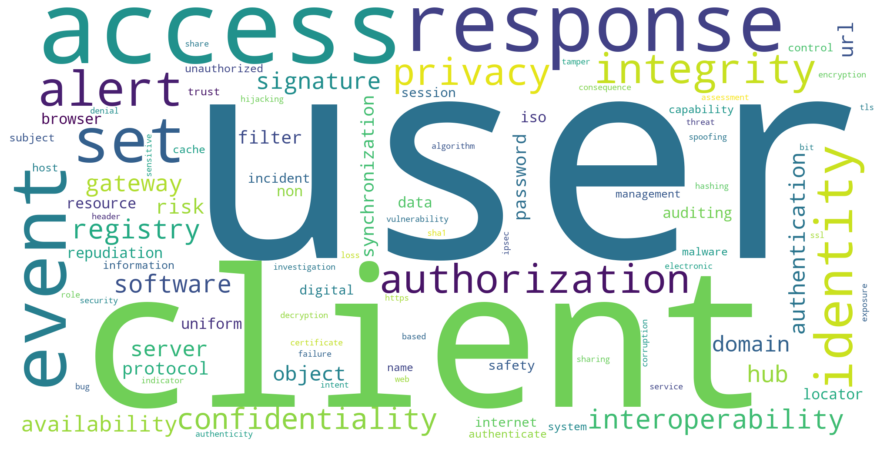

In [ ]:
bow=""

for kw in cats_dict['INTEGRITY'].keys():
  for i in range(0, cats_dict['INTEGRITY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.7) Wordcloud keywords associate a OPERATIONAL

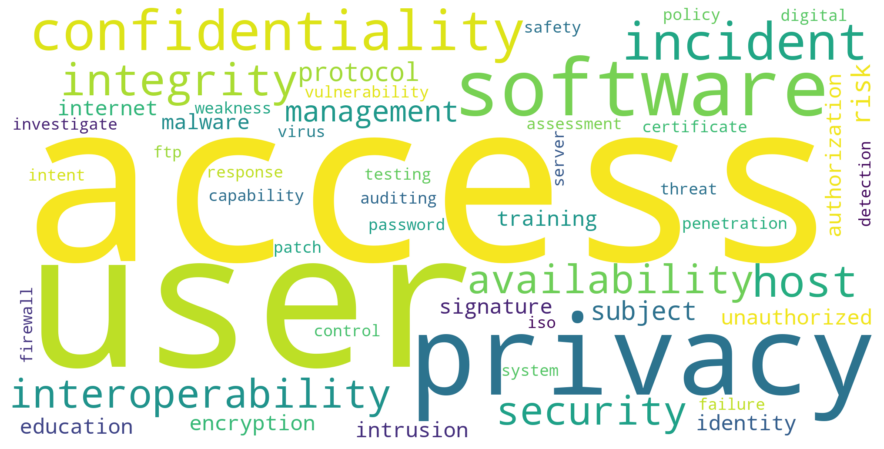

In [ ]:
bow=""

for kw in cats_dict['OPERATIONAL'].keys():
  for i in range(0, cats_dict['OPERATIONAL'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###2.4.8) Wordcloud keywords associate a PRIVACY

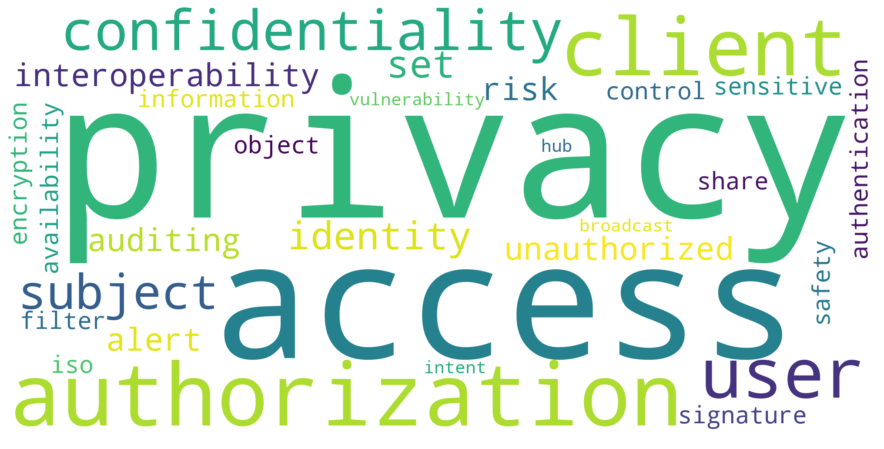

In [ ]:
bow=""

for kw in cats_dict['PRIVACY'].keys():
  for i in range(0, cats_dict['PRIVACY'][kw]):
    bow+= kw + " "


wordcloud = WordCloud(width = 2000, height = 1000, collocations=False, background_color="white").generate(bow)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##2.5) Frequenza keywords in percentuale per ogni categoria

In [ ]:
keywords_list = []

for i in range(0, len(df)):
  keywords = df.iloc[i]["Security Words"]
  if keywords != 'none': 
    keywords = ast.literal_eval(keywords)
    for word in keywords:
      if word not in keywords_list:
        keywords_list.append(word)
len(keywords_list)

117

In [ ]:
cats = ['ACCESS_CONTROL_IDENTITY',	'ACCOUNTABILITY',	'AVAILABILITY',	'CONFIDENTIALITY',	'INTEGRITY',	'OPERATIONAL',	'PRIVACY']
cats_dict = dict.fromkeys(cats, 0)
for key in cats_dict.keys():
  cats_dict[key] = dict.fromkeys(keywords_list, 0)
  
#cats_dict
print(cats_dict['ACCESS_CONTROL_IDENTITY']['access'])

0


In [ ]:
for i in range(0, len(df)):
  categories = df.iloc[i]["Categories"]
  keywords = df.iloc[i]["Security Words"]
  if keywords != 'none': 
    keywords = ast.literal_eval(keywords)
    for cat in categories:
      for kw in keywords:
        cats_dict[cat][kw] += 1

#cats_dict

In [ ]:
cat_occurr = dict.fromkeys(cats, 0)
for i in range(0, len(df)):
  categories = df.iloc[i]["Categories"]
  for cat in categories:
    cat_occurr[cat] += 1

#cat_occurr

In [ ]:
for cat in cats_dict.keys():
  for kw in cats_dict[cat].keys():
    cats_dict[cat][kw] = (cats_dict[cat][kw] / cat_occurr[cat]) * 100
    
#cats_dict

In [ ]:
final_dic = dict.fromkeys(cats, 0)

for cat in cats_dict.keys():
  final_dic[cat] = {}
  for kw in cats_dict[cat].keys():
    if cats_dict[cat][kw] >= 2:
        final_dic[cat][kw] = cats_dict[cat][kw]

for cat in final_dic.keys():
  sort_orders = sorted(final_dic[cat].items(), key=lambda x: x[1], reverse=True)
  print("Keywords associate alla categoria " + cat + ":")
  if(sort_orders):
    for item in sort_orders:
      print("\t" + item[0] + ": " + str(item[1]))
  else:
      print("\tNessuna")
  print("\n")

Keywords associate alla categoria ACCESS_CONTROL_IDENTITY:
	user: 17.269076305220885
	authentication: 14.056224899598394
	access: 8.433734939759036
	identity: 6.827309236947792
	password: 3.614457831325301
	authenticate: 2.8112449799196786


Keywords associate alla categoria ACCOUNTABILITY:
	user: 5.814676616915423
	access: 5.317164179104478
	client: 3.3893034825870645
	response: 2.4875621890547266
	event: 2.1144278606965177


Keywords associate alla categoria AVAILABILITY:
	access: 11.320754716981133
	availability: 7.547169811320755
	user: 4.40251572327044
	server: 3.7735849056603774
	integrity: 3.1446540880503147
	confidentiality: 3.1446540880503147


Keywords associate alla categoria CONFIDENTIALITY:
	access: 7.080610021786492
	user: 6.027596223674655
	client: 3.159041394335512
	response: 2.6143790849673203
	event: 2.4691358024691357


Keywords associate alla categoria INTEGRITY:
	user: 4.760213143872114
	client: 3.4813499111900534
	access: 2.6287744227353462
	response: 2.4156305506

##2.6) Quanti requisiti non hanno una keyword associata?

In [ ]:
counter = 0
for i in range(0, len(df)):
  lst = df.loc[i]["Security Words"]
  if not isinstance(lst, list) and lst == 'none':
    counter += 1

print(counter)

2830


4032
2830


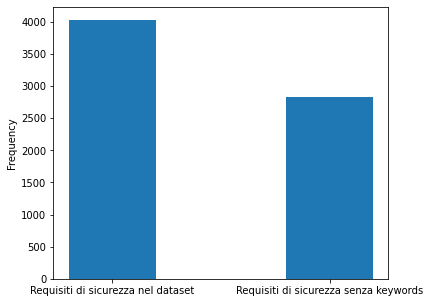

In [ ]:
plt.figure(figsize=(6,5))
data = {'Requisiti di sicurezza nel dataset': len(df), 'Requisiti di sicurezza senza keywords' : counter}

plt.bar(list(data.keys()), list(data.values()), width = 0.4)
plt.ylabel('Frequency')


print(len(df))
print(counter)

##2.7) Quanti requisiti per ciascuna categoria non hanno security words associate?

In [ ]:
no_kw_cat = dict.fromkeys(cats, 0)

for i in range(0, len(df)):
  lst = df.loc[i]["Security Words"]
  categories = df.loc[i]["Categories"]
  if not isinstance(lst, list) and lst == 'none':
    for c in categories:
      no_kw_cat[c] += 1

no_kw_cat

{'ACCESS_CONTROL_IDENTITY': 119,
 'ACCOUNTABILITY': 2357,
 'AVAILABILITY': 106,
 'CONFIDENTIALITY': 1958,
 'INTEGRITY': 2150,
 'OPERATIONAL': 110,
 'PRIVACY': 137}

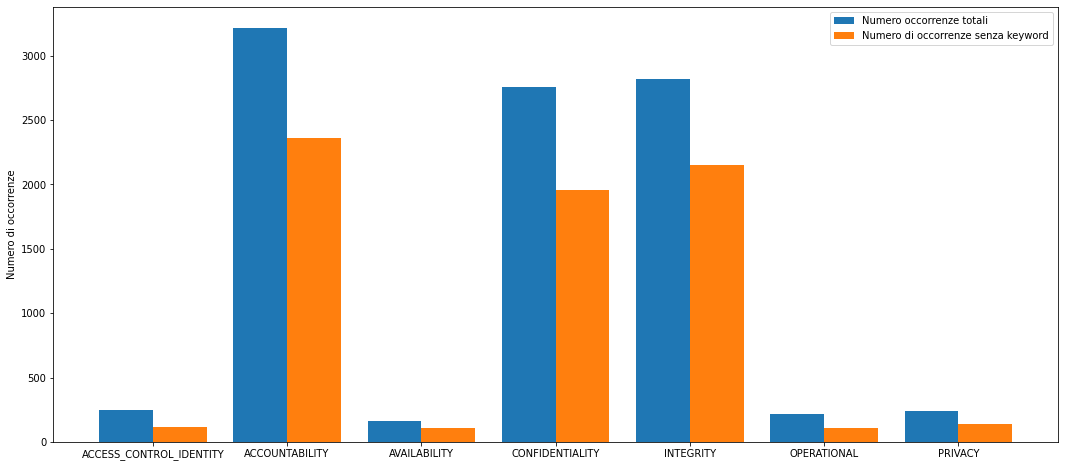

In [ ]:
plt.figure(figsize=(18, 8))
labels = list(no_kw_cat.keys())
num_cat = list(n_cats.values())
nokw_cat = list(no_kw_cat.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



plt.bar(x - 0.2, num_cat, 0.4, label = 'Numero occorrenze totali')
plt.bar(x + 0.2, nokw_cat, 0.4, label = 'Numero di occorrenze senza keyword')
  
plt.xticks(x, labels)

plt.ylabel("Numero di occorrenze")
plt.legend()
plt.show()
